In [319]:
from jupyterthemes import jtplot
jtplot.style('monokai')

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [311]:
import numpy as np

In [312]:
m = np.arange(12).reshape((3,4))
print('Overall mean: ', m.flatten().mean())
print('Mean on columns: ', m.mean(axis = 0))
print('Mean on columns: ', m.mean(axis = 1))

Overall mean:  5.5
Mean on columns:  [4. 5. 6. 7.]
Mean on columns:  [1.5 5.5 9.5]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [313]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print('Using outer function in numpy: \n', np.outer(u,v))
print('Using list comprehension: \n',np.array([i * j for i in u for j in v]).reshape(4,4))
print('Using list broadcasting: \n',u*v.reshape(4,1))

Using outer function in numpy: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using list broadcasting: 
 [[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [314]:
a = np.random.rand(10,6)
line = np.any(a < 0.1, axis = 1)
a[line,:] = 0

#in questo caso line mi fa un vettore di 6 valori che è il risultato di n.any ovvero dei true
# o false a seconda che si verifica la condizione

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

No handles with labels found to put in legend.


Extracting every 10 elements:  [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

Reversed array:
 [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1

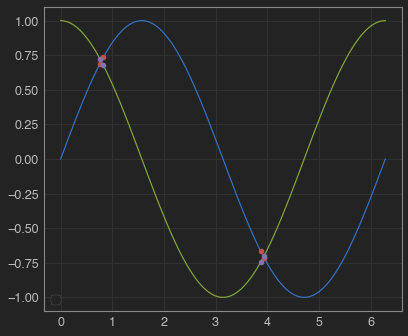

In [323]:
import matplotlib.pyplot as plt

a = np.linspace(0,2*np.pi,100)
print('Extracting every 10 elements: ', a[::10])
print('\nReversed array:\n', a[::-1])

sin_cos_mask = (np.abs(np.sin(a)-np.cos(a))<0.1)
b = a[sin_cos_mask]
print('\nElements where |sin(a[i])-cos(a[i])|<0.1', b)

plt.plot(a, np.sin(a))
plt.plot(a, np.cos(a))
plt.plot(b, np.sin(b),'o')
plt.plot(b, np.cos(b),'o')
plt.legend()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [316]:
a = np.arange(1,11)
b = a.reshape(10,1)
m = a*b
print('\nThe trace of the matrix m is:\n', np.trace(m))
print('\nThe antidiagonal of the matrix m is:\n', np.fliplr(m).diagonal())
print('\nThe diagonal offset by 1 upward of the matrix m is:\n', np.diag(m,+1))


The trace of the matrix m is:
 385

The antidiagonal of the matrix m is:
 [10 18 24 28 30 30 28 24 18 10]

The diagonal offset by 1 upward of the matrix m is:
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [306]:
cities = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

distances = np.array([np.abs(x-y) for x in positions_miles for y in positions_miles])
final = distances.reshape(10,10) * 1.6
print(final)

[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  966.4  480.     0.   110.4  700.8 1556.8]
 [2470.4 2153.6 1985.6 1292.8 1076.8  590.4  110.4    0.   590.4 1446.4]
 [3060.8 2744.  2576.  1883.2 1667.2 1180.8  700.8  590.4    0.   856. ]
 [3916.8 3600.  3432.  2739.2 2523.2 2036.8 1556.8 1446.4  856.     0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [307]:
def SieveOfEratosthenes(n): 
      
    # Create a boolean array "prime[0..n]" and initialize 
    # all entries it as true. A value in prime[i] will 
    # finally be false if i is Not a prime, else true. 
    prime = [True for i in range(n + 1)] 
    p = 2
    while (p * p <= n): 
          
        # If prime[p] is not changed, then it is a prime 
        if (prime[p] == True): 
              
            # Update all multiples of p 
            for i in range(p * 2, n + 1, p): 
                prime[i] = False
        p += 1
    prime[0]= False
    prime[1]= False
    # Print all prime numbers 
    for p in range(n + 1): 
        if prime[p]: 
            print p, #Use print(p) for python 3 
  
# driver program 
if __name__=='__main__': 
    n = 30
    print "Following are the prime numbers smaller",  
    #Use print("Following are the prime numbers smaller") for Python 3 
    print "than or equal to", n 
    #Use print("than or equal to", n) for Python 3 
    SieveOfEratosthenes(n) 

SyntaxError: invalid syntax (<ipython-input-307-fff4e33091f9>, line 22)

In [308]:

prime(1)

div = True
for i in range(N):
    for h in range(2,i):
        if i % h == 0: 
            div = False
    mask.append( div )
    visMask.append([i, div])
    div = True
N = 100
mask = []
visMask = []
div = True
for i in range(N):
    for h in range(2,i):
        if i % h == 0: 
            div = False
    mask.append( div )
    visMask.append([i, div])
    div = True
#print(visMask)
a = np.arange(100)[mask] 
print(a)



IndexError: index 1 is out of bounds for axis 0 with size 1

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [309]:
def single_walk(steps, initial_pos):
    
    pos = initial_pos
    positions = np.array([0 for i in range(steps)])
    positions[0] = initial_pos
    
    for i in range(1,steps):
        pseudo_random_numer = np.random.rand()
    
        if pseudo_random_numer > 0.5:
            pos = pos+1
        else:
            pos = pos-1
        
        positions[i] = pos
        
    return positions
        
def multiple_walks(N, initial_pose, steps):
    positions = np.zeros((N,steps))
    
    for i in range(N):
        positions[i,:] = single_walk(steps, initial_pose)
        
    return positions

print(multiple_walks(4, 50, 99))
print('I obtain what I expected but I am always relying on the goodness of the PRNG')

[[50. 51. 52. 51. 50. 49. 48. 47. 48. 49. 48. 47. 48. 49. 50. 51. 52. 51.
  50. 51. 52. 51. 52. 53. 52. 53. 54. 55. 54. 55. 54. 55. 54. 53. 52. 51.
  52. 53. 52. 53. 54. 53. 52. 51. 50. 51. 52. 51. 50. 51. 50. 51. 52. 51.
  50. 49. 50. 51. 52. 51. 52. 51. 50. 51. 50. 51. 50. 51. 50. 51. 52. 53.
  54. 53. 54. 53. 52. 51. 50. 49. 50. 49. 50. 49. 48. 47. 46. 45. 46. 45.
  46. 45. 44. 43. 42. 43. 42. 41. 40.]
 [50. 49. 48. 47. 48. 47. 46. 45. 46. 47. 48. 49. 50. 51. 50. 51. 50. 51.
  52. 51. 52. 51. 50. 49. 48. 49. 48. 49. 50. 49. 50. 49. 48. 49. 50. 51.
  52. 51. 52. 53. 52. 51. 50. 49. 50. 51. 50. 49. 48. 47. 48. 49. 48. 47.
  48. 47. 48. 49. 48. 49. 50. 51. 52. 53. 52. 53. 54. 53. 54. 53. 54. 55.
  54. 55. 54. 55. 54. 53. 52. 53. 54. 53. 54. 53. 54. 53. 54. 53. 54. 53.
  54. 53. 54. 53. 54. 53. 52. 51. 50.]
 [50. 51. 52. 51. 50. 49. 48. 47. 46. 47. 48. 47. 48. 49. 50. 51. 52. 53.
  52. 53. 52. 53. 52. 51. 50. 49. 48. 47. 46. 45. 46. 45. 44. 45. 46. 47.
  46. 45. 46. 47. 48. 47. 46. 47. 

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

SyntaxError: invalid syntax (<ipython-input-296-dd0ffb010ae3>, line 1)